# Seguimiento semana 4

**Integrantes:**


*   Yuliana Duarte Quintero
*   Dilia Maria Luna Melo

*Fecha*: 15 de febrero 2024

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy as np


array([[[ 62, 228,  97],
        [ 62, 228,  97],
        [ 62, 228,  97],
        ...,
        [ 72, 240, 104],
        [ 72, 240, 104],
        [ 72, 240, 104]],

       [[ 62, 228,  97],
        [ 62, 228,  97],
        [ 62, 228,  97],
        ...,
        [ 72, 240, 104],
        [ 72, 240, 104],
        [ 72, 240, 104]],

       [[ 62, 228,  97],
        [ 62, 228,  97],
        [ 62, 228,  97],
        ...,
        [ 72, 240, 104],
        [ 72, 240, 104],
        [ 72, 240, 104]],

       ...,

       [[ 65, 240, 107],
        [ 66, 241, 108],
        [ 66, 241, 108],
        ...,
        [ 71, 247, 110],
        [ 71, 247, 110],
        [ 71, 247, 110]],

       [[ 65, 240, 107],
        [ 66, 241, 108],
        [ 66, 241, 108],
        ...,
        [ 69, 247, 110],
        [ 69, 247, 110],
        [ 69, 247, 110]],

       [[ 65, 240, 107],
        [ 66, 241, 108],
        [ 66, 241, 108],
        ...,
        [ 70, 248, 111],
        [ 69, 247, 110],
        [ 69, 247, 110]]], dtype=uint8)
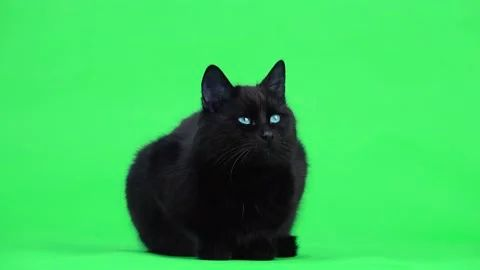

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Visión por computador/Seguimientos de clase/cat.jpg')
image

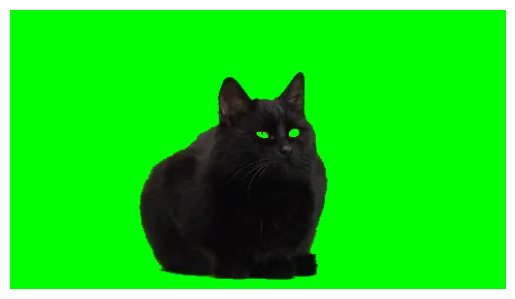

In [ ]:
# Cambiar el fondo a verde
new_background_color = (0, 255, 0)  # Verde
imagen_con_fondo_verde = cambiar_fondo(image_path, new_background_color)

# Mostrar la imagen resultante
plt.imshow(cv2.cvtColor(imagen_con_fondo_verde, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


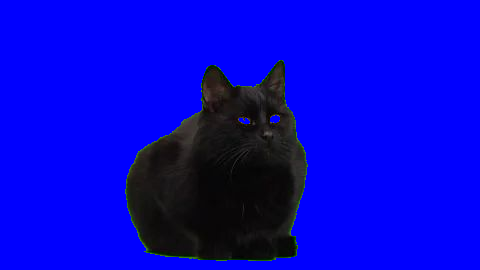

In [ ]:
# Cargar la imagen original
image_original = cv2.imread('/content/drive/MyDrive/Visión por computador/Seguimientos de clase/cat.jpg')

# Convertir la imagen a espacio de color HSV
hsv_image = cv2.cvtColor(image_original, cv2.COLOR_BGR2HSV)

# Definir los umbrales para los ojos verdes en el espacio de color HSV
green_lower = np.array([40, 50, 50])  # Umbral inferior para verde
green_upper = np.array([80, 255, 255])  # Umbral superior para verde

# Crear una máscara para los ojos verdes
green_mask = cv2.inRange(hsv_image, green_lower, green_upper)

# Aplicar un umbral adaptativo para obtener una máscara binaria del perro
gray_image = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Invertir la máscara para que el perro sea blanco y el fondo negro
mask = cv2.bitwise_not(mask)

# Fusionar la máscara del perro con la máscara de los ojos verdes
mask_preserved = cv2.bitwise_or(mask, green_mask)

# Aplicar la máscara para obtener solo el perro
dog = cv2.bitwise_and(image_original, image_original, mask=mask_preserved)

# Definir el nuevo color de fondo (azul en este caso)
new_background_color = (255, 0, 0)  # Azul (en formato BGR)

# Aplicar el nuevo color de fondo a los píxeles donde la máscara de fondo sea 1
image_original[mask == 0] = new_background_color

from google.colab.patches import cv2_imshow

# Mostrar el resultado
cv2_imshow(image_original)
cv2.waitKey(0)
cv2.destroyAllWindows()


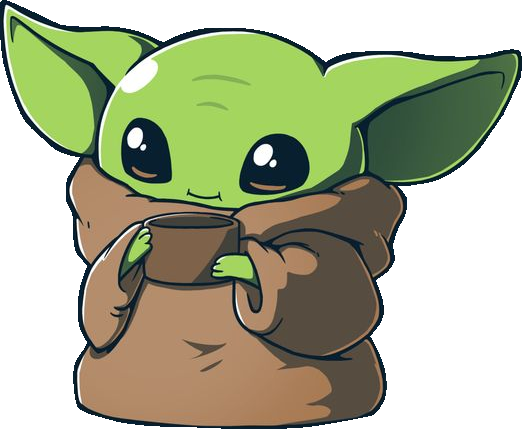

In [ ]:
yoda = cv2.imread('/content/drive/MyDrive/Visión por computador/Seguimientos de clase/image.png')
cv2_imshow(yoda)

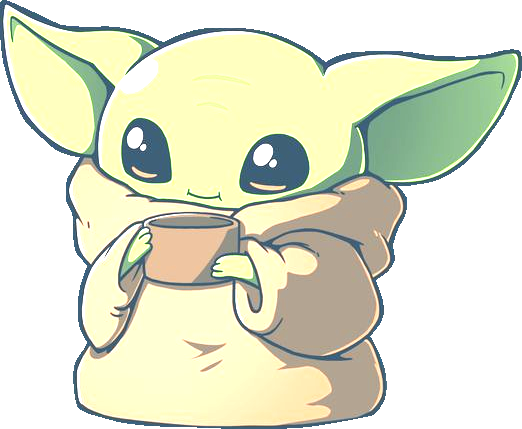

In [ ]:
 #Paso 3: Implementar los operadores de punto (brillo y contraste)
# Ajustar el brillo y el contraste
brillo = 50
contraste = 1.5
imagen_brillo_contraste = np.clip(contraste * yoda + brillo, 0, 255).astype(np.uint8)

# Mostrar la imagen con el brillo y contraste ajustados
cv2_imshow(imagen_brillo_contraste)



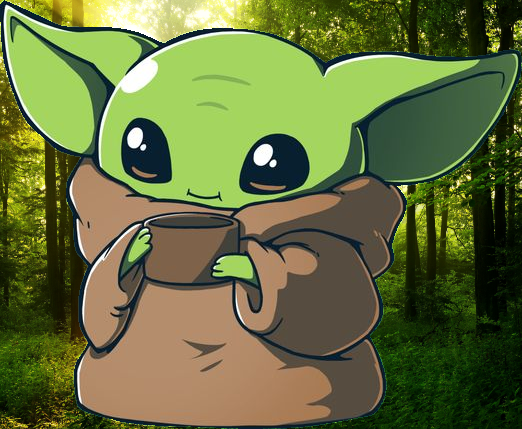

In [ ]:
# Cargar la imagen original (con transparencia) y la imagen de fondo (bosque)
image_original = cv2.imread('/content/drive/MyDrive/Visión por computador/Seguimientos de clase/image.png', cv2.IMREAD_UNCHANGED)
background_image = cv2.imread('/content/drive/MyDrive/Visión por computador/Seguimientos de clase/Bosque.png')

# Redimensionar la imagen de fondo para que coincida con las dimensiones de la imagen original
background_image_resized = cv2.resize(background_image, (image_original.shape[1], image_original.shape[0]))

# Separar la imagen original en el objeto y el fondo
object_mask = image_original[:, :, 3]  # Canal alfa como máscara
object_with_alpha = image_original[:, :, 0:3]  # Imagen con canales RGB sin alfa

# Invertir la máscara (para que el objeto sea blanco y el fondo negro)
object_mask_inverted = cv2.bitwise_not(object_mask)

# Aplicar la máscara al objeto y al fondo
object_only = cv2.bitwise_and(object_with_alpha, object_with_alpha, mask=object_mask)
background_only = cv2.bitwise_and(background_image_resized, background_image_resized, mask=object_mask_inverted)

# Combinar el objeto y el fondo
result = cv2.add(object_only, background_only)

from google.colab.patches import cv2_imshow

# Mostrar el resultado
cv2_imshow(result)
cv2.waitKey(0)
cv2.destroyAllWindows()


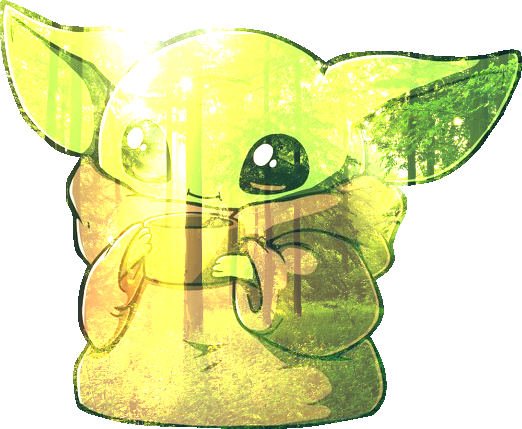

In [ ]:
# Cargar la imagen original y la imagen de fondo
image_original = cv2.imread('/content/drive/MyDrive/Visión por computador/Seguimientos de clase/image.png')
background_image = cv2.imread('/content/drive/MyDrive/Visión por computador/Seguimientos de clase/Bosque.png')

# Redimensionar la imagen de fondo para que coincida con las dimensiones de la imagen original
background_image_resized = cv2.resize(background_image, (image_original.shape[1], image_original.shape[0]))

# Colocar la imagen de fondo
image_with_background = cv2.addWeighted(image_original, 1, background_image_resized, 1, 0)

from google.colab.patches import cv2_imshow

# Mostrar la imagen resultante
cv2_imshow(image_with_background)
cv2.waitKey(0)
cv2.destroyAllWindows()


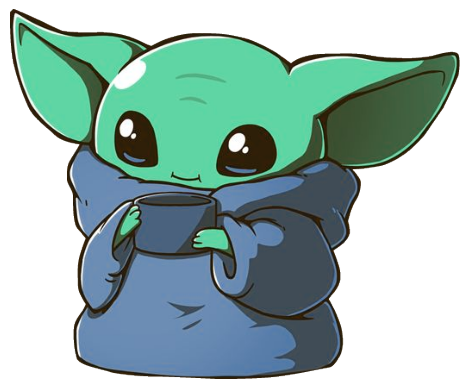

In [ ]:
# Cargar la imagen PNG con transparencia
image = cv2.imread('/content/drive/MyDrive/Visión por computador/Seguimientos de clase/image.png', cv2.IMREAD_UNCHANGED)

# Extraer el canal alfa (máscara de transparencia)
alpha_channel = image[:, :, 3]

# Crear una máscara alfa con tres canales (RGB)
alpha_mask = cv2.cvtColor(alpha_channel, cv2.COLOR_GRAY2RGB) / 255.0

# Crear una imagen RGBA combinando la imagen original y la máscara alfa
rgba_image = np.dstack((image[:, :, :3], alpha_channel))

# Mostrar la imagen utilizando matplotlib
plt.imshow(rgba_image)
plt.axis('off')
plt.show()


<ipython-input-48-87f058b5dbc7>:8: RuntimeWarning: invalid value encountered in sqrt
  magnitud_gradiente = np.sqrt(sobel_x*2 + sobel_y*2)
<ipython-input-48-87f058b5dbc7>:9: RuntimeWarning: invalid value encountered in cast
  magnitud_gradiente = np.uint8(magnitud_gradiente)


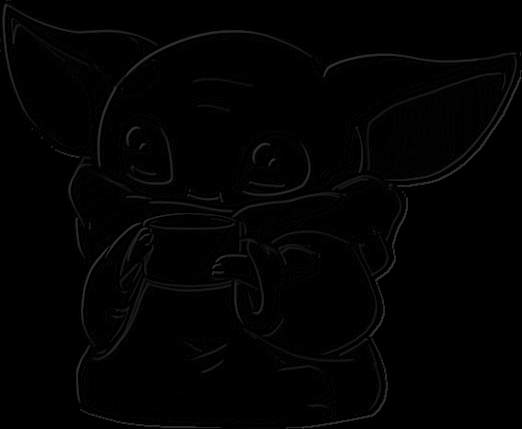

In [ ]:
# Paso 4: Implementar el operador Sobel
# Convertir la imagen a escala de grises
imagen_gris = cv2.cvtColor(yoda, cv2.COLOR_BGR2GRAY)
# Aplicar el operador Sobel
sobel_x = cv2.Sobel(imagen_gris, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(imagen_gris, cv2.CV_64F, 0, 1, ksize=3)
# Combinar las magnitudes de los gradientes
magnitud_gradiente = np.sqrt(sobel_x*2 + sobel_y*2)
magnitud_gradiente = np.uint8(magnitud_gradiente)
# Mostrar la imagen con los bordes resaltados usando el operador Sobel
cv2_imshow(magnitud_gradiente)